##### THIS IS SOME MARK DOWN
 Data frame


In [10]:
import pandas as pd
import numpy as np
 
#Create a DataFrame
d = {
    'Name':['Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine',
            'Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine'],
    'Exam':['Semester 1','Semester 1','Semester 1','Semester 1','Semester 1','Semester 1',
            'Semester 2','Semester 2','Semester 2','Semester 2','Semester 2','Semester 2'],
     
    'Subject':['Mathematics','Mathematics','Mathematics','Science','Science','Science',
               'Mathematics','Mathematics','Mathematics','Science','Science','Science'],
    'Score':[62,47,55,74,31,77,85,63,42,67,89,81]
    }
 
df = pd.DataFrame(d,columns=['Name','Exam','Subject','Score'])
df

,Name,Exam,Subject,Score
0,Alisa,Semester 1,Mathematics,62
1,Bobby,Semester 1,Mathematics,47
2,Cathrine,Semester 1,Mathematics,55
3,Alisa,Semester 1,Science,74
4,Bobby,Semester 1,Science,31
5,Cathrine,Semester 1,Science,77
6,Alisa,Semester 2,Mathematics,85
7,Bobby,Semester 2,Mathematics,63
8,Cathrine,Semester 2,Mathematics,42
9,Alisa,Semester 2,Science,67


In [11]:
len(df)

12

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df.size

48

In [14]:
df.shape

(12, 4)

In [15]:
df.shape[0]

12

In [16]:
df.shape[1]

4


Import Data From Excel


In [17]:
raw_data = pd.read_csv("https://gist.githubusercontent.com/aanorbel/563e5ce7f30e9e6bf25e430a8464ffbb/raw/1a557bdcfe0a4061eaa980120a57de74c2fbf0f5/linear.csv")
raw_data.head()

,x,y
0,82.583220,134.907414
1,73.922466,134.085180
2,34.887445,NaN
3,61.839983,114.530638
4,16.775940,31.376437


##### Selections

In [18]:
type(df.Name)

pandas.core.series.Series

In [19]:
type(df[['Name', 'Score']])

pandas.core.frame.DataFrame

In [20]:
alisa=df.loc[df["Name"]=='Alisa',['Name','Exam','Subject','Score']]
alisa

,Name,Exam,Subject,Score
0,Alisa,Semester 1,Mathematics,62
3,Alisa,Semester 1,Science,74
6,Alisa,Semester 2,Mathematics,85
9,Alisa,Semester 2,Science,67


In [21]:
Sem1=df.loc[(df["Exam"]=='Semester 1')& (df["Name"]=='Alisa')  ,['Name','Exam','Subject','Score']]
Sem1

,Name,Exam,Subject,Score
0,Alisa,Semester 1,Mathematics,62
3,Alisa,Semester 1,Science,74


In [22]:
filtered_data = raw_data[~np.isnan(raw_data["y"])]
len(filtered_data)

92

In [23]:
# First Row
df.iloc[0]

Name             Alisa
Exam        Semester 1
Subject    Mathematics
Score               62
Name: 0, dtype: object

In [24]:
# last Row
df.iloc[-1]

Name         Cathrine
Exam       Semester 2
Subject       Science
Score              81
Name: 11, dtype: object

In [25]:
#First Column
df.iloc[:,0]

0        Alisa
1        Bobby
2     Cathrine
3        Alisa
4        Bobby
5     Cathrine
6        Alisa
7        Bobby
8     Cathrine
9        Alisa
10       Bobby
11    Cathrine
Name: Name, dtype: object

In [26]:
#Last Column
df.iloc[:,-1]

0     62
1     47
2     55
3     74
4     31
5     77
6     85
7     63
8     42
9     67
10    89
11    81
Name: Score, dtype: int64

#### Define independant Variables



In [27]:
dx=df.iloc[:,[1,2,0]]
dx

,Exam,Subject,Name
0,Semester 1,Mathematics,Alisa
1,Semester 1,Mathematics,Bobby
2,Semester 1,Mathematics,Cathrine
3,Semester 1,Science,Alisa
4,Semester 1,Science,Bobby
5,Semester 1,Science,Cathrine
6,Semester 2,Mathematics,Alisa
7,Semester 2,Mathematics,Bobby
8,Semester 2,Mathematics,Cathrine
9,Semester 2,Science,Alisa


In [28]:
dx=df.iloc[:,:-1]
dx

,Name,Exam,Subject
0,Alisa,Semester 1,Mathematics
1,Bobby,Semester 1,Mathematics
2,Cathrine,Semester 1,Mathematics
3,Alisa,Semester 1,Science
4,Bobby,Semester 1,Science
5,Cathrine,Semester 1,Science
6,Alisa,Semester 2,Mathematics
7,Bobby,Semester 2,Mathematics
8,Cathrine,Semester 2,Mathematics
9,Alisa,Semester 2,Science


In [31]:
df.loc[:,['Score']]

,Score
0,62
1,47
2,55
3,74
4,31
5,77
6,85
7,63
8,42
9,67


##### LabelEncoder

In [32]:
type(dx.Exam)

pandas.core.series.Series

In [33]:
type(dx[['Exam']])

pandas.core.frame.DataFrame

In [34]:
dx=df.iloc[:,-3:-1]
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dx.Exam = labelencoder.fit_transform(dx.Exam)
#dx.Exam = labelencoder.fit_transform(dx[['Exam']])
dx.Subject = labelencoder.fit_transform(dx.Subject)
dx

,Exam,Subject
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
5,0,1
6,1,0
7,1,0
8,1,0
9,1,1


##### OneHotEncoder

In [35]:
from sklearn.preprocessing import OneHotEncoder
X = dx[['Exam','Subject']].values
type(X)

numpy.ndarray

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [39]:
dfCorr=pd.read_csv("https://gist.githubusercontent.com/aanorbel/563e5ce7f30e9e6bf25e430a8464ffbb/raw/1a557bdcfe0a4061eaa980120a57de74c2fbf0f5/data.csv")

In [40]:
dfCorr.head(5)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [41]:
dfCorr.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.155408,0.009403,0.922717
Pulse,-0.155408,1.000000,0.786535,0.025121
Maxpulse,0.009403,0.786535,1.000000,0.203813
Calories,0.922717,0.025121,0.203813,1.000000


In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [43]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

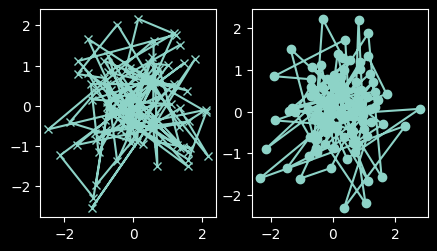

In [44]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

Text(0.5, 1.0, 'scatter()')

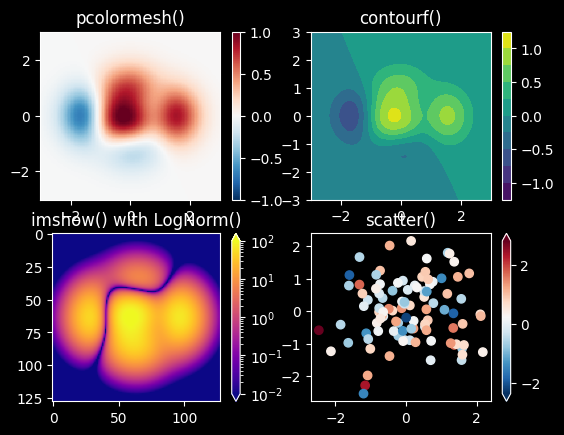

In [45]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

#fig, axs = plt.subplots(2, 2, layout='constrained')
fig, axs = plt.subplots(2, 2)
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

In [46]:
class Person:
  def __init__(self, fname, lname):
    self.firstname = fname
    self.lastname = lname

  def printname(self):
    print(self.firstname, self.lastname)

class Student(Person):
  def __init__(self, fname, lname, year,gpa):
    super().__init__(fname, lname)
    self.graduationyear = year
    self.GPA = gpa

  def welcome(self):
    print("Welcome", self.firstname, self.lastname, "to the class of", self.graduationyear, "with the GPA: ", self.GPA)

x = Student("DSC", "Olsen", 2019, '3,48')
x.welcome()


Welcome DSC Olsen to the class of 2019 with the GPA:  3,48


In [47]:
# importing the random module
import random
import string
import csv

header = ['Customer', 'fName', 'lName', 'Year', 'GPA']

with open('customer3.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)  

    
# initializing size of string
N = 7 

print(random.randint(0,9))

for i in range(1,10):
    # using random.choices()
    # generating random strings
    name = ''.join(random.choices(string.ascii_letters, k=N))
    name2 = ''.join(random.choices(string.ascii_letters, k=9))
    print("The generated random string : " + str(name))
    x = Student("Customer"+str(i), "Balance"+ str(random.randint(-500,500)), "200"+str(random.randint(0,9)), '3,48')
    x.welcome()
    with open('customer3.csv', 'a+', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        # write the data
        data = [str(i),name, name2, str(random.randint(-500,500)), str(random.randint(-500,500))]    
        writer.writerow(data)
    

6
The generated random string : RwhgBYO
Welcome Customer1 Balance159 to the class of 2000 with the GPA:  3,48
The generated random string : FqlQoxv
Welcome Customer2 Balance-386 to the class of 2003 with the GPA:  3,48
The generated random string : MHQfOyQ
Welcome Customer3 Balance-379 to the class of 2009 with the GPA:  3,48
The generated random string : tpjKjKs
Welcome Customer4 Balance-278 to the class of 2003 with the GPA:  3,48
The generated random string : xJSOPgL
Welcome Customer5 Balance429 to the class of 2002 with the GPA:  3,48
The generated random string : KVxkVhI
Welcome Customer6 Balance332 to the class of 2002 with the GPA:  3,48
The generated random string : LZDAXcJ
Welcome Customer7 Balance-323 to the class of 2005 with the GPA:  3,48
The generated random string : xoJNsgX
Welcome Customer8 Balance-73 to the class of 2006 with the GPA:  3,48
The generated random string : RUxiHIA
Welcome Customer9 Balance-452 to the class of 2008 with the GPA:  3,48


In [48]:
raw_data = pd.read_csv("customer3.csv")
raw_data.head()

,Customer,fName,lName,Year,GPA
0,1,RwhgBYO,RksmDNGaa,-406,-439
1,2,FqlQoxv,VvexeDVcn,478,244
2,3,MHQfOyQ,fTMnSDvjj,176,235
3,4,tpjKjKs,VhytHcXhe,483,377
4,5,xJSOPgL,jQStsKBGz,305,480


In [49]:
# Import writer class from csv module
from csv import writer
 
# List that we want to add as a new row
List = [6, 'William', 5532, 1, 'UAE']
 
# Open our existing CSV file in append mode
# Create a file object for this file
with open('cutomer4.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

In [50]:
import csv

header = ['name', 'area', 'country_code2', 'country_code3']
data = ['Afghanistan', 652090, 'AF', 'AFG']


with open('customer3.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write the data
    writer.writerow(data)

In [51]:
x=5
x|=3

In [52]:
x

7